# Introduction to data analysis with R
## Data import
### Set working environment

In [1]:
library(xlsx)
library(gdata)
# install.packages('tidyverse')
library(dplyr)
library(readxl)
library(RColorBrewer)
# setwd('~/Projects/r_workshop/)
getwd()

Loading required package: rJava
Loading required package: xlsxjars
gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith


Attaching package: ‘dplyr’

The following objects are masked from ‘package:gdata’:

    combine, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] "/Users/mjmoon/Projects/r_workshop/scripts"

+ Set to Project folder with R Project (RStudio)
+ Set to notebook folder with Jupyter notebook
+ Otherwise, use `setwd(...)` command

### Read data from files
+ `read.csv()`
+ `read.xlsx()`

In [2]:
df <- read.csv('../data/R_intro_data.csv', header=TRUE)
head(df)

ID,Age,Sex,Race,Area,SES,smoke,BP,Start,stop,event
1,63,F,White,Rural,Medium,0,65.42547,01/01/2010,06/05/2010,1
2,69,F,White,Rural,Low,0,67.71778,01/01/2010,03/04/2010,1
3,70,F,White,Rural,Medium,0,72.98176,01/01/2010,31/03/2010,1
4,62,M,White,Rural,High,0,69.30087,01/01/2010,29/04/2010,1
5,68,M,NA,Rural,NA,0,66.78176,01/01/2010,11/03/2010,1
6,65,M,White,Rural,Low,0,63.36826,01/01/2010,20/04/2010,1


In [3]:
df_xlsx <- read.xlsx('../data/R_intro_excel.xlsx', sheetName='Data')
head(df_xlsx)

ID,Age,Sex,Race,Area,SES,smoke,BP,Start,stop,event
1,63,F,White,Rural,Medium,0,65.42547,2010-01-01 05:00:00,2010-05-06 07:17:03,1
2,69,F,White,Rural,Low,0,67.71778,2010-01-01 05:00:00,2010-04-03 20:37:34,1
3,70,F,White,Rural,Medium,0,72.98176,2010-01-01 05:00:00,2010-03-31 00:39:51,1
4,62,M,White,Rural,High,0,69.30087,2010-01-01 05:00:00,2010-04-29 11:44:42,1
5,68,M,NA,Rural,NA,0,66.78176,2010-01-01 05:00:00,2010-03-11 14:40:25,1
6,65,M,White,Rural,Low,0,63.36826,2010-01-01 05:00:00,2010-04-20 08:28:01,1


In [4]:
df_xlsx <- read_excel('../data/R_intro_excel.xlsx')
head(df_xlsx)

ID,Age,Sex,Race,Area,SES,smoke,BP,Start,stop,event
1,63,F,White,Rural,Medium,0,65.42547,2010-01-01 05:00:00,2010-05-06 07:17:03,1
2,69,F,White,Rural,Low,0,67.71778,2010-01-01 05:00:00,2010-04-03 20:37:34,1
3,70,F,White,Rural,Medium,0,72.98176,2010-01-01 05:00:00,2010-03-31 00:39:51,1
4,62,M,White,Rural,High,0,69.30087,2010-01-01 05:00:00,2010-04-29 11:44:42,1
5,68,M,NA,Rural,NA,0,66.78176,2010-01-01 05:00:00,2010-03-11 14:40:25,1
6,65,M,White,Rural,Low,0,63.36826,2010-01-01 05:00:00,2010-04-20 08:28:01,1


## Data management
### Check dimensions

In [5]:
dim(df)

[1] 100  11

### Check variable names and types

In [6]:
t(names(df))

ID,Age,Sex,Race,Area,SES,smoke,BP,Start,stop,event


In [7]:
# change names to lower case
names(df) <- tolower(names(df))

In [8]:
str(df)

'data.frame':	100 obs. of  11 variables:
 $ id   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ age  : int  63 69 70 62 68 65 65 61 66 NA ...
 $ sex  : Factor w/ 2 levels "F","M": 1 1 1 2 2 2 2 1 2 1 ...
 $ race : Factor w/ 2 levels "Other","White": 2 2 2 2 NA 2 2 1 2 1 ...
 $ area : Factor w/ 2 levels "Rural","Urban": 1 1 1 1 1 1 1 1 1 1 ...
 $ ses  : Factor w/ 3 levels "High","Low","Medium": 3 2 3 1 NA 2 2 3 3 1 ...
 $ smoke: int  0 0 0 0 0 0 0 1 0 1 ...
 $ bp   : num  65.4 67.7 73 69.3 66.8 ...
 $ start: Factor w/ 1 level "01/01/2010": 1 1 1 1 1 1 1 1 1 1 ...
 $ stop : Factor w/ 87 levels "02/06/2010","02/06/2011",..: 17 5 86 78 27 51 83 10 64 38 ...
 $ event: int  1 1 1 1 1 1 1 0 1 1 ...


In [9]:
# integers to categorical variables
df$smoke <- factor(
    df$smoke, 
    levels=c(0, 1, -1),
    labels=c('Non-Smoker', 'Smoker', 'Missing')
)

In [10]:
# managing date types
head(as.Date(df$stop, '%d/%m/%Y'))
head(as.Date(substr(df_xlsx$stop, 1, 10), '%Y-%m-%d'))

head(as.POSIXct(strptime(df$stop, '%d/%m/%Y')))
head(as.POSIXct(strptime(df_xlsx$stop, '%Y-%m-%d %H:%M:%OS')))

[1] "2010-05-06" "2010-04-03" "2010-03-31" "2010-04-29" "2010-03-11"
[6] "2010-04-20"

[1] "2010-05-06" "2010-04-03" "2010-03-31" "2010-04-29" "2010-03-11"
[6] "2010-04-20"

[1] "2010-05-06 EDT" "2010-04-03 EDT" "2010-03-31 EDT" "2010-04-29 EDT"
[5] "2010-03-11 EST" "2010-04-20 EDT"

[1] "2010-05-06 07:17:03 EDT" "2010-04-03 20:37:34 EDT"
[3] "2010-03-31 00:39:51 EDT" "2010-04-29 11:44:42 EDT"
[5] "2010-03-11 14:40:25 EST" "2010-04-20 08:28:01 EDT"

In [11]:
# date variables
df$start <- as.Date(df$start, '%d/%m/%Y')
df$stop <- as.Date(df$stop, '%d/%m/%Y')

In [12]:
summary(df)

       id              age     sex       race       area        ses    
 Min.   :  1.00   Min.   :60   F:37   Other:25   Rural:30   High  :30  
 1st Qu.: 25.75   1st Qu.:63   M:63   White:72   Urban:70   Low   :24  
 Median : 50.50   Median :65          NA's : 3              Medium:43  
 Mean   : 50.50   Mean   :65                                NA's  : 3  
 3rd Qu.: 75.25   3rd Qu.:67                                           
 Max.   :100.00   Max.   :70                                           
                  NA's   :3                                            
        smoke          bp            start                 stop           
 Non-Smoker:68   Min.   :57.40   Min.   :2010-01-01   Min.   :2010-01-31  
 Smoker    :29   1st Qu.:67.61   1st Qu.:2010-01-01   1st Qu.:2010-04-12  
 Missing   : 3   Median :73.66   Median :2010-01-01   Median :2010-05-11  
                 Mean   :74.33   Mean   :2010-01-01   Mean   :2010-09-12  
                 3rd Qu.:79.24   3rd Qu.:2010-01-

### Table categorical variables

In [13]:
# race variable
y <- summary(df$race)
y

Other White  NA's 
   25    72     3

In [14]:
cbind(y, proportion_decimal=prop.table(y))

,y,proportion_decimal
Other,25,0.25
White,72,0.72
NA's,3,0.03


In [15]:
cbind(y, proportion_percentage=prop.table(y)*100)

,y,proportion_percentage
Other,25,25
White,72,72
NA's,3,3


In [16]:
paste(names(y), ': ', y, ' (', prop.table(y)*100, '%)', sep='')

[1] "Other: 25 (25%)" "White: 72 (72%)" "NA's: 3 (3%)"

In [17]:
# sex
cbind(sex=table(df$sex), 
      proportion=paste(
          prop.table(table(df$sex))*100, '%', sep=''
      ))

,sex,proportion
F,37,37%
M,63,63%


In [18]:
# area
cbind(area=table(df$area), 
      proportion=paste(
          prop.table(table(df$area))*100, '%', sep=''
      ))

,area,proportion
Rural,30,30%
Urban,70,70%


In [19]:
# smoke
cbind(smoke=table(df$smoke), 
      proportion=paste(
          prop.table(table(df$smoke))*100, '%', sep=''
      ))

,smoke,proportion
Non-Smoker,68,68%
Smoker,29,29%
Missing,3,3%


In [20]:
# ses
cbind(ses=table(df$ses), 
      proportion=paste(
          prop.table(table(df$ses))*100, '%', sep=''
      ))

,ses,proportion
High,30,30.9278350515464%
Low,24,24.7422680412371%
Medium,43,44.3298969072165%


In [21]:
df$ses <- factor(df$ses, levels=levels(df$ses)[c(1,3,2)])

### Label missing values

In [22]:
# count na
count_na <- function(col){
    sum(is.na(col))
}
t(sapply(df, count_na))

id,age,sex,race,area,ses,smoke,bp,start,stop,event
0,3,0,3,0,3,0,2,0,0,0


*Why doesn't the following work?*

In [23]:
df$race[is.na(df$race)] <- 3

Warning message in `[<-.factor`(`*tmp*`, is.na(df$race), value = 3):
“invalid factor level, NA generated”

In [24]:
str(df$race)
orig_levels <- levels(df$race)

 Factor w/ 2 levels "Other","White": 2 2 2 2 NA 2 2 1 2 1 ...


#### Adding an additional factor
1. convert the variable to numeric
2. add the additional variable as max(existing)+1
3. convert back to factor with labels

In [25]:
df$race <- as.numeric(df$race)
df$race[is.na(df$race)] <- max(df$race, na.rm=TRUE) + 1
df$race <- factor(df$race, labels=c(orig_levels, 'Missing'))
summary(df$race)

Other   White Missing 
     25      72       3

In [26]:
orig_levels <- levels(df$ses)
df$ses <- as.numeric(df$ses)
df$ses[is.na(df$ses)] <- max(df$ses, na.rm=TRUE) + 1
df$ses <- factor(df$ses, labels=c(orig_levels, 'Missing'))
summary(df$ses)

High  Medium     Low Missing 
     30      43      24       3

### Plot a single categorical variable

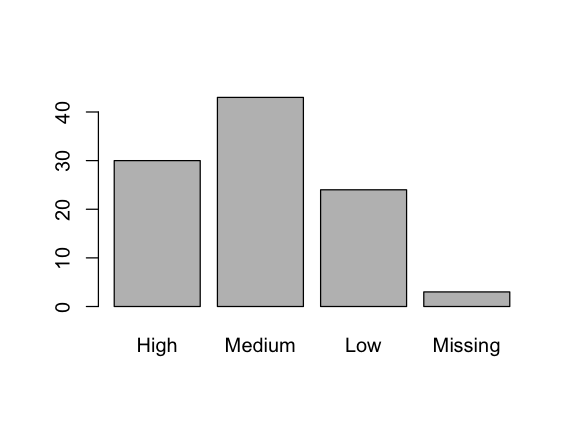

In [27]:
library(repr)
# Change plot size to (4 x 3)x1.2
options(repr.plot.width=4*1.2, repr.plot.height=3*1.2)

ses <- table(df$ses)
barplot(ses, names.arg = levels(df$ses))

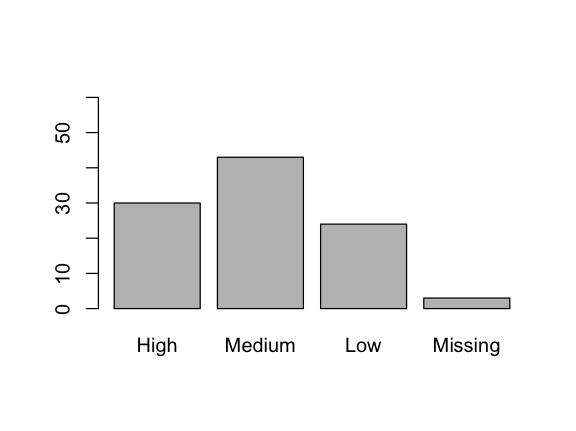

In [28]:
barplot(ses, names.arg = levels(df$ses), ylim=c(0, 60))

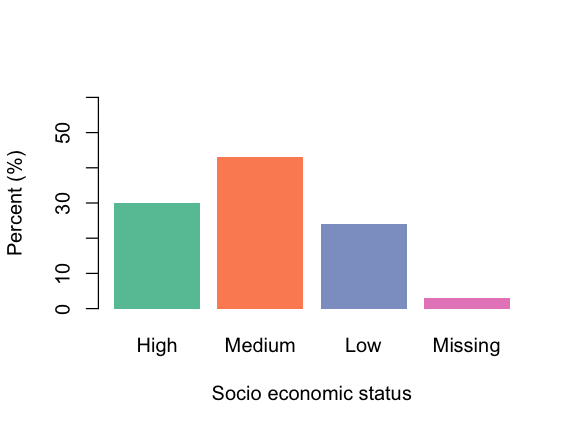

In [29]:
barplot(
    ses, 
    names.arg = levels(df$ses), 
    ylim=c(0, 60),
    ylab='Percent (%)', 
    xlab='Socio economic status',
    col=brewer.pal(4, 'Set2'),
    border=FALSE
)

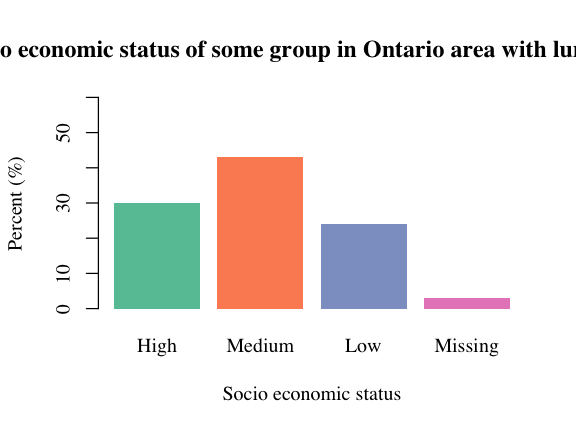

In [30]:
par(family = 'serif')
barplot(
    ses, 
    names.arg = levels(df$ses), 
    ylim=c(0, 60),
    ylab='Percent (%)', 
    xlab='Socio economic status',
    col=brewer.pal(4, 'Set2'),
    border=FALSE,
    main='Figure 3A: Socio economic status of some group in Ontario area with lung cancer incidences'
)

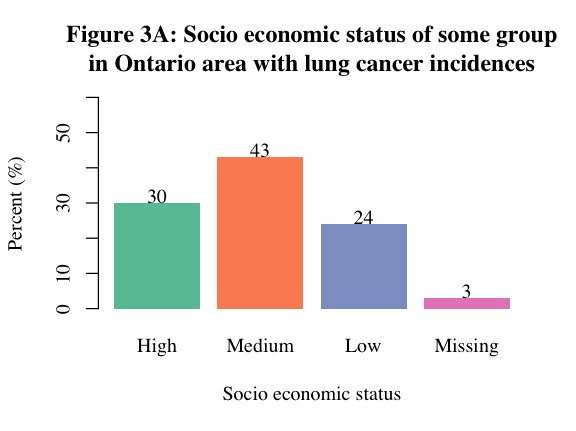

In [31]:
par(family = 'serif')
plt1 = barplot(
    ses, 
    names.arg = levels(df$ses), 
    ylim=c(0, 60),
    ylab='Percent (%)', 
    xlab='Socio economic status',
    col=brewer.pal(4, 'Set2'),
    border=FALSE,
    main='Figure 3A: Socio economic status of some group\nin Ontario area with lung cancer incidences'
)
text(plt1, ses+2, labels=round(ses,0), col='black')

### Check bivariate associations

In [32]:
sex_smoke <- table(df$sex, df$smoke)
prop.table(sex_smoke)

   
    Non-Smoker Smoker Missing
  F       0.28   0.07    0.02
  M       0.40   0.22    0.01

In [33]:
prop.table(sex_smoke, margin=1)

   
    Non-Smoker     Smoker    Missing
  F 0.75675676 0.18918919 0.05405405
  M 0.63492063 0.34920635 0.01587302

In [34]:
round(prop.table(sex_smoke, margin=2)*100, 2)

   
    Non-Smoker Smoker Missing
  F      41.18  24.14   66.67
  M      58.82  75.86   33.33

In [35]:
chisq.test(df$sex, df$smoke)

Warning message in chisq.test(df$sex, df$smoke):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  df$sex and df$smoke
X-squared = 3.6997, df = 2, p-value = 0.1573


In [36]:
# small cell size (smoke = 'Missing') causes the warning
chisq.test(
    df$sex[df$smoke!='Missing'], 
    df$smoke[df$smoke!='Missing']
)


	Pearson's Chi-squared test with Yates' continuity correction

data:  df$sex[df$smoke != "Missing"] and df$smoke[df$smoke != "Missing"]
X-squared = 1.8736, df = 1, p-value = 0.1711


### Plot bivariate associations

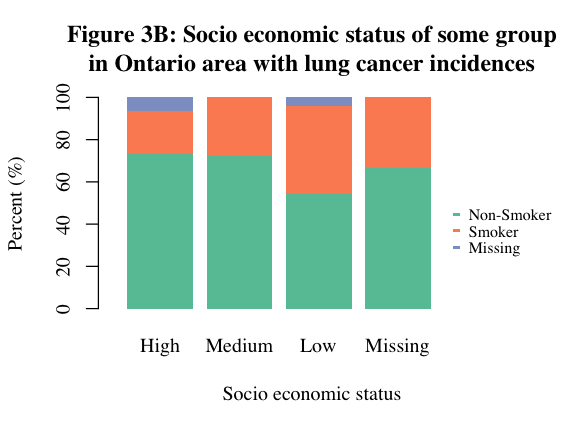

In [37]:
par(family = 'serif')
ses_smoke <- prop.table(
    table(df$smoke, df$ses), 
    2
)
# stacked
barplot(
    ses_smoke*100, 
    names.arg = levels(df$ses),
    ylim=c(0, 100), 
    xlim=c(0, 6),
    ylab='Percent (%)',
    xlab='Socio economic status',
    col=brewer.pal(3, 'Set2'),
    border=FALSE,
    main=paste('Figure 3B: Socio economic status of some group',
               '\nin Ontario area with lung cancer incidences',
               sep='')
)
legend(
    5, 50, 
    levels(df$smoke), 
    fill=brewer.pal(3, 'Set2'), 
    border=FALSE,
    bg='white',
    bty='n',
    xjust=0,
    y.intersp=2.5,
    cex=0.8,
    xpd=TRUE
)

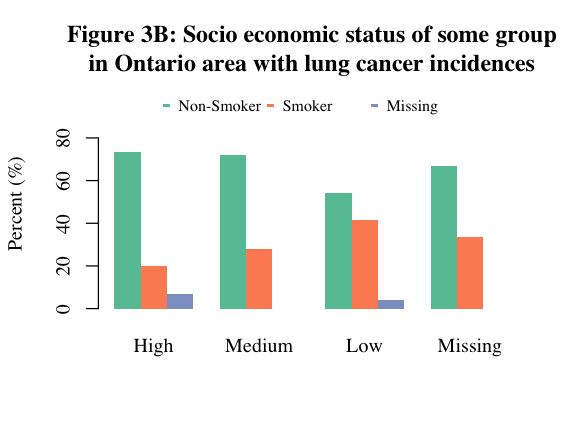

In [38]:
# side by side
par(family = 'serif')
barplot(
    ses_smoke*100, 
    names.arg = levels(df$ses),
    ylim=c(0, 99), 
    ylab='Percent (%)',
    xlab='',
    col=brewer.pal(3, 'Set2'),
    border=FALSE,
    main=paste('Figure 3B: Socio economic status of some group',
               '\nin Ontario area with lung cancer incidences',
               sep=''),
    beside=TRUE
)
legend(
    'top',
    levels(df$smoke), 
    fill=brewer.pal(3, 'Set2'), 
    border=FALSE,
    bg='white',
    bty='n',
    horiz=TRUE,
    text.width=3,
    xjust=0.5,
    y.intersp=1.5,
    cex=0.8,
    xpd=TRUE
)

### Check continuous variables

In [39]:
mean(df$age)

[1] NA

In [40]:
mean(df$age, na.rm=TRUE)

[1] 65

In [41]:
sd(df$age, na.rm=TRUE)

[1] 2.933286

In [42]:
summary(df$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     60      63      65      65      67      70       3 

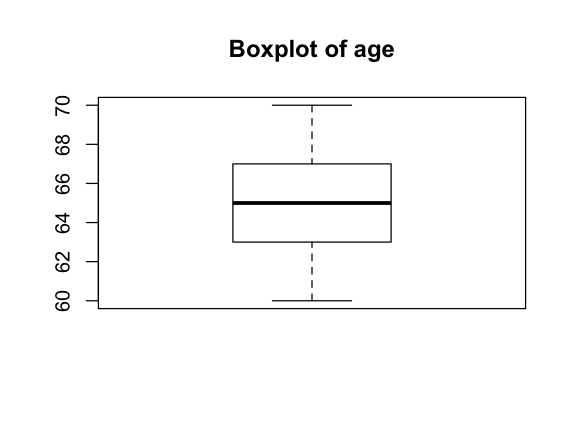

In [43]:
boxplot(
    df$age,
    main='Boxplot of age'
)

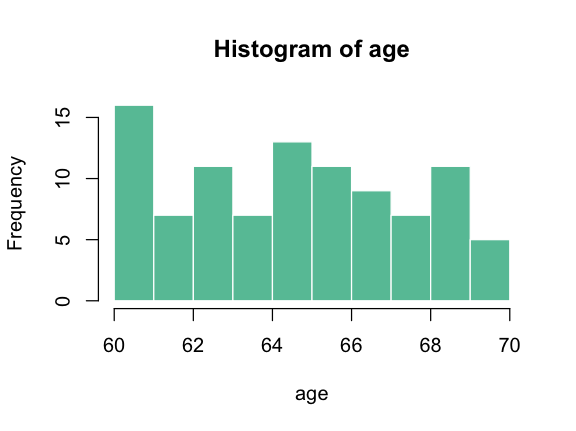

In [44]:
hist(
    df$age,
    main='Histogram of age',
    col=brewer.pal(3, 'Set2')[1],
    border='white',
    xlab='age'
)

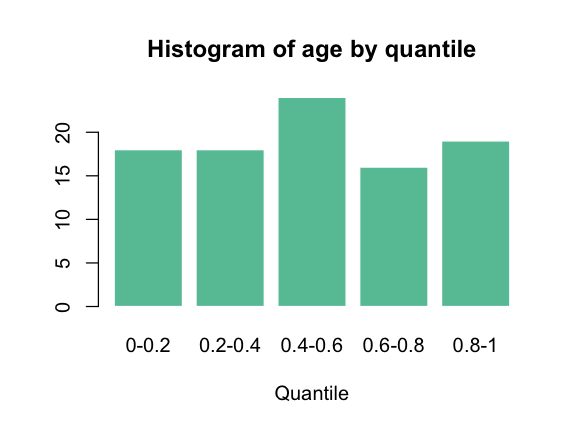

In [45]:
df$age[is.na(df$age)] <- 99
df$age.grp <- cut(
    df$age, 
    quantile(df$age, prob=seq(0,1,0.2), na.rm=TRUE),
    labels=FALSE
)

barplot(
    table(df$age.grp),
    names.arg=paste(seq(0,0.8,0.2), seq(0.2,1,0.2), sep='-'),
    xlab='Quantile',
    main='Histogram of age by quantile',
    col=brewer.pal(3, 'Set2')[1],
    border='white'
)

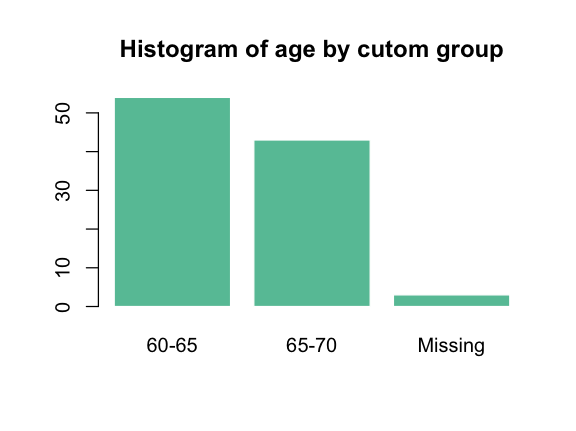

In [46]:
df$age.grp <- cut(
    df$age,
    c(59, 65, 71, 99),
    labels=c('60-65', '65-70', 'Missing')
)

barplot(
    table(df$age.grp),
    main='Histogram of age by cutom group',
    col=brewer.pal(3, 'Set2')[1],
    border='white'
)

### Check continuous variable with categorical variables

In [47]:
mean(df$bp, na.rm=TRUE)
sd(df$bp, na.rm=TRUE)

[1] 74.33087

[1] 8.807639

In [48]:
summary(df$bp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  57.40   67.61   73.66   74.33   79.24   95.56       2 

In [49]:
which(is.na(df$bp))

[1] 70 90

In [50]:
df[is.na(df$bp), ]

,id,age,sex,race,area,ses,smoke,bp,start,stop,event,age.grp
70,70,61,M,White,Urban,Medium,Non-Smoker,NA,2010-01-01,2010-07-10,0,60-65
90,90,61,F,White,Urban,High,Non-Smoker,NA,2010-01-01,2010-02-18,1,60-65


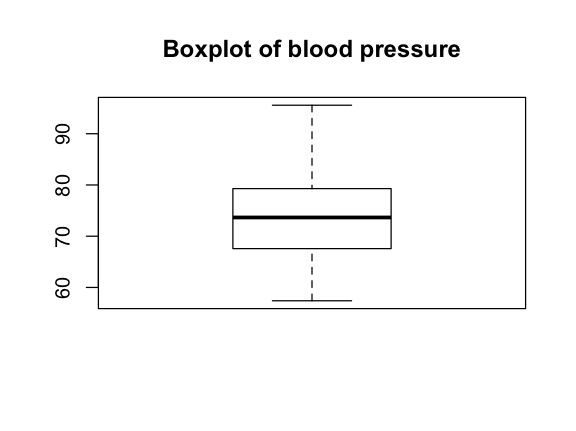

In [51]:
boxplot(
    df$bp,
    main='Boxplot of blood pressure'
)

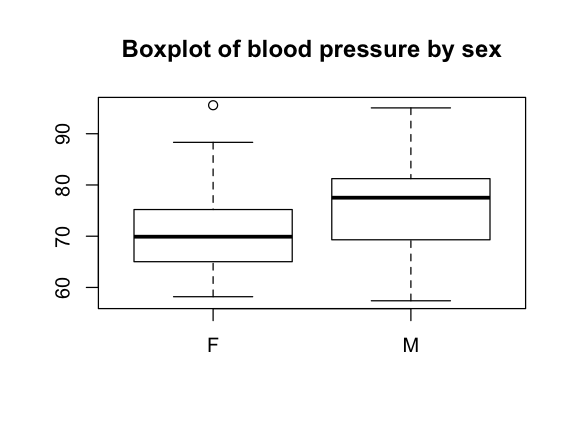

In [52]:
boxplot(
    df$bp~df$sex,
    main='Boxplot of blood pressure by sex'
)

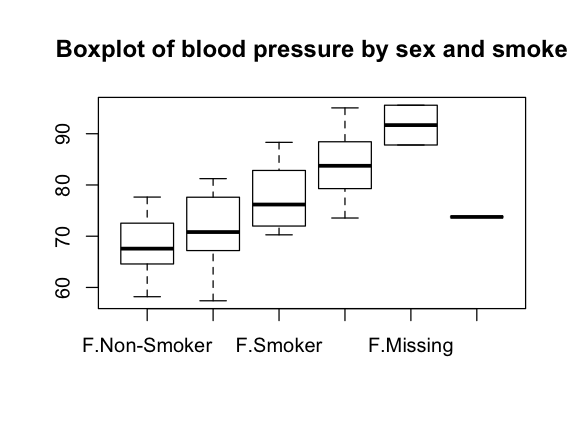

In [53]:
boxplot(
    df$bp~df$sex+df$smoke,
    main='Boxplot of blood pressure by sex and smoke'
)

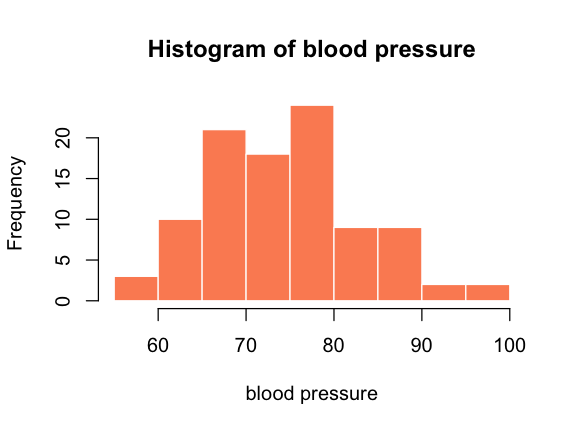

In [54]:
hist(
    df$bp,
    main='Histogram of blood pressure',
    col=brewer.pal(3, 'Set2')[2],
    border='white',
    xlab='blood pressure'
)

In [55]:
bp_agg <- aggregate(
    df$bp, 
    by=list(df$ses, df$smoke),
    mean,
    na.rm=TRUE
)
colnames(bp_agg) <- c('ses' ,'smoke', 'bp_mean')
bp_agg

ses,smoke,bp_mean
High,Non-Smoker,74.55318
Medium,Non-Smoker,69.46431
Low,Non-Smoker,64.46335
Missing,Non-Smoker,69.58598
High,Smoker,90.40955
Medium,Smoker,82.09627
Low,Smoker,78.94949
Missing,Smoker,83.44854
High,Missing,91.68280
Low,Missing,73.76216


In [56]:
df %>%
    group_by(ses, smoke) %>%
    summarize(
        bp_mean = mean(bp, na.rm=TRUE),
        bp_sd = sd(bp, na.rm=TRUE)
    )

ses,smoke,bp_mean,bp_sd
High,Non-Smoker,74.55318,4.055324
High,Smoker,90.40955,3.204781
High,Missing,91.68280,5.489739
Medium,Non-Smoker,69.46431,6.222414
Medium,Smoker,82.09627,6.518982
Low,Non-Smoker,64.46335,3.114624
Low,Smoker,78.94949,4.664503
Low,Missing,73.76216,NA
Missing,Non-Smoker,69.58598,3.965774
Missing,Smoker,83.44854,NA


In [57]:
bp_agg <- df %>%
    group_by(ses, smoke) %>%
    summarize(
        bp_mean = mean(bp, na.rm=TRUE),
        bp_sd = sd(bp, na.rm=TRUE)
    )
bp_agg %>%
    filter(smoke == 'Smoker')

ses,smoke,bp_mean,bp_sd
High,Smoker,90.40955,3.204781
Medium,Smoker,82.09627,6.518982
Low,Smoker,78.94949,4.664503
Missing,Smoker,83.44854,NA


In [58]:
round(xtabs(bp_agg$bp_mean ~ bp_agg$ses + bp_agg$smoke), 2)

          bp_agg$smoke
bp_agg$ses Non-Smoker Smoker Missing
   High         74.55  90.41   91.68
   Medium       69.46  82.10    0.00
   Low          64.46  78.95   73.76
   Missing      69.59  83.45    0.00

## Data analysis

### Linear regression prediction and confidence intervals

In [59]:
lm_bp <- lm(bp ~ smoke+ses+age.grp+sex+race+area, data=df)
summary(lm_bp)


Call:
lm(formula = bp ~ smoke + ses + age.grp + sex + race + area, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6941 -1.5979 -0.0647  1.8284  7.1352 

Coefficients: (1 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     71.8857     1.6939  42.439  < 2e-16 ***
smokeSmoker      9.4007     1.6376   5.741 1.35e-07 ***
smokeMissing    10.1624     2.3832   4.264 5.08e-05 ***
sesMedium       -5.0753     0.8666  -5.857 8.22e-08 ***
sesLow          -8.6059     1.0846  -7.935 6.71e-12 ***
sesMissing      -9.1648     2.4054  -3.810 0.000258 ***
age.grp65-70     6.2410     0.7220   8.644 2.40e-13 ***
age.grpMissing   7.2553     2.1842   3.322 0.001309 ** 
sexM             4.1917     0.7680   5.458 4.47e-07 ***
raceWhite       -4.9096     1.7151  -2.863 0.005264 ** 
raceMissing          NA         NA      NA       NA    
areaUrban        2.6084     0.8579   3.040 0.003122 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’

In [60]:
lm_bp <- lm(bp ~ age, data=df)
summary(lm_bp)


Call:
lm(formula = bp ~ age, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1768  -6.8982  -0.3952   4.7067  20.3971 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  50.6335     8.8148   5.744 1.08e-07 ***
age           0.3584     0.1327   2.701  0.00817 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.535 on 96 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.07064,	Adjusted R-squared:  0.06096 
F-statistic: 7.297 on 1 and 96 DF,  p-value: 0.008166


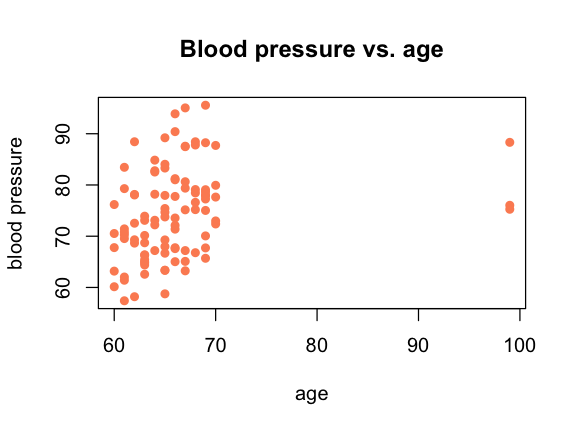

In [61]:
plot(
    df$age,
    df$bp,
    main='Blood pressure vs. age',
    xlab='age',
    ylab='blood pressure',
    col=brewer.pal(3, 'Set2')[2],
    pch=16
)

In [62]:
df_clean <- df[df$age!=99 & !is.na(df$bp),]
lm_bp <- lm(bp ~ age, data=df_clean)
summary(lm_bp)


Call:
lm(formula = bp ~ age, data = df_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.3065  -6.7945  -0.6849   5.5438  18.6694 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.2789    18.9717  -0.067 0.946398    
age           1.1590     0.2912   3.980 0.000136 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.202 on 93 degrees of freedom
Multiple R-squared:  0.1455,	Adjusted R-squared:  0.1364 
F-statistic: 15.84 on 1 and 93 DF,  p-value: 0.0001364


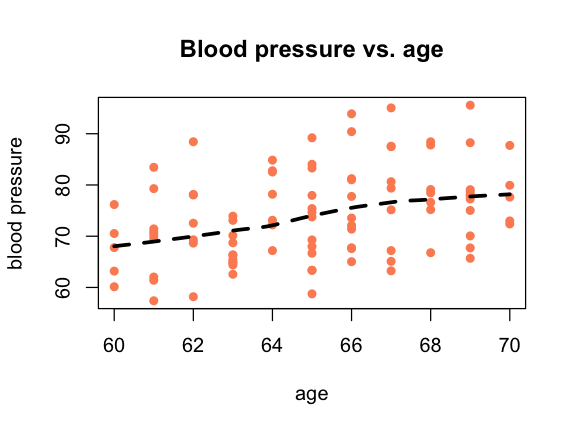

In [63]:
# LOESS: locally weighted scatterplot smooting
# good for exploratory analysis
loess_curve <- loess.smooth(
    df_clean$age, 
    df_clean$bp
)
plot(
    df_clean$age,
    df_clean$bp,
    main='Blood pressure vs. age',
    xlab='age',
    ylab='blood pressure',
    col=brewer.pal(3, 'Set2')[2],
    pch=16
)
lines(
    loess_curve$x,
    loess_curve$y,
    lwd=3, lty=2,
)

In [64]:
conf <- predict(lm_bp, interval=c('confidence'))
pred <- predict(lm_bp, interval=c('prediction'))
colnames(conf) <- paste('conf', colnames(conf), sep='.')
colnames(pred) <- paste('pred', colnames(pred), sep='.')
head(cbind(conf, pred))

Warning message in predict.lm(lm_bp, interval = c("prediction")):
“predictions on current data refer to _future_ responses
”

,conf.fit,conf.lwr,conf.upr,pred.fit,pred.lwr,pred.upr
1,71.74024,69.67985,73.80064,71.74024,55.32256,88.15793
2,78.69445,75.88017,81.50874,78.69445,62.16523,95.22368
3,79.85349,76.55598,83.15100,79.85349,63.23516,96.47181
4,70.58121,68.13712,73.02530,70.58121,54.11097,87.05145
5,77.53542,75.16146,79.90937,77.53542,61.07544,93.99539
6,74.05831,72.38650,75.73012,74.05831,57.68486,90.43177


In [65]:
intv <- data.frame(
    age = df_clean$age,
    conf,
    pred[ ,2:3]
)
intv <- intv[order(intv$age), ]
head(intv)

,age,conf.fit,conf.lwr,conf.upr,pred.lwr,pred.upr
19,60,68.26314,64.88131,71.64497,51.62788,84.89840
28,60,68.26314,64.88131,71.64497,51.62788,84.89840
38,60,68.26314,64.88131,71.64497,51.62788,84.89840
39,60,68.26314,64.88131,71.64497,51.62788,84.89840
45,60,68.26314,64.88131,71.64497,51.62788,84.89840
8,61,69.42218,66.52895,72.31540,52.87932,85.96503


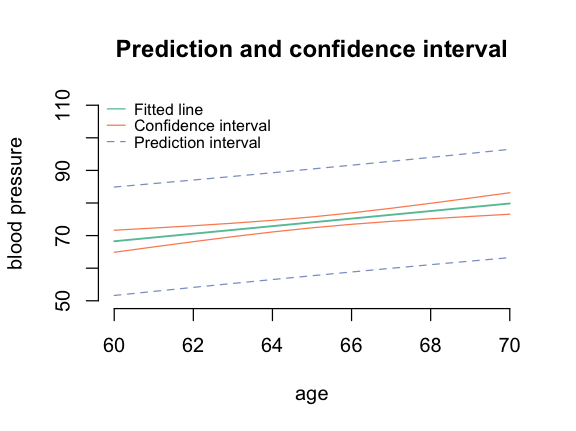

In [66]:
plot(
    intv$age,
    intv$conf.fit,
    type='l',
    lwd=1.5,
    col=brewer.pal(3, 'Set2')[1],
    ylim=c(50, 110),
    xlab='age',
    ylab='blood pressure',
    main='Prediction and confidence interval',
    bty='n'
)
lines(intv$age, intv$conf.lwr, 
      col=brewer.pal(3, 'Set2')[2])
lines(intv$age, intv$conf.upr, 
      col=brewer.pal(3, 'Set2')[2])
lines(intv$age, intv$pred.lwr, lty=2,
      col=brewer.pal(3, 'Set2')[3])
lines(intv$age, intv$pred.upr, lty=2,
      col=brewer.pal(3, 'Set2')[3])
legend(
    'topleft',
    c(
        'Fitted line', 
        'Confidence interval', 
        'Prediction interval'
    ),
    col=brewer.pal(3, 'Set2'),
    lty=c(1, 1, 2),
    border=FALSE,
    bg='white',
    bty='n',
    xjust=0.5,
    y.intersp=2.5,
    cex=0.8,
    xpd=TRUE
)

### Logistic regression

In [67]:
logit_smk <- glm(
    smoke~age.grp+ses+area, 
    data=df,
    family=binomial(link='logit')
)
summary(logit_smk)


Call:
glm(formula = smoke ~ age.grp + ses + area, family = binomial(link = "logit"), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1389  -0.8209  -0.7890   1.2276   1.6975  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)  
(Intercept)    -1.14474    0.61378  -1.865   0.0622 .
age.grp65-70   -0.02594    0.45993  -0.056   0.9550  
age.grpMissing  0.40518    1.33303   0.304   0.7612  
sesMedium       0.09301    0.55858   0.167   0.8678  
sesLow          0.91616    0.61488   1.490   0.1362  
sesMissing      0.46887    1.37412   0.341   0.7329  
areaUrban       0.13719    0.52830   0.260   0.7951  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 125.37  on 99  degrees of freedom
Residual deviance: 122.50  on 93  degrees of freedom
AIC: 136.5

Number of Fisher Scoring iterations: 4


### Survival analysis

In [68]:
library(survival)
df$surv <- df$stop-df$start
head(df$surv)
str(df$surv)

Time differences in days
[1] 125  92  89 118  69 109

Class 'difftime'  atomic [1:100] 125 92 89 118 69 109 119 336 83 439 ...
  ..- attr(*, "units")= chr "days"


In [69]:
sm_event <- coxph(
    Surv(surv, event)~age.grp+sex+smoke+bp+race+area+ses,
    data=df
)
summary(sm_event)

Warning message in coxph(Surv(surv, event) ~ age.grp + sex + smoke + bp + race + :
“X matrix deemed to be singular; variable 12”

Call:
coxph(formula = Surv(surv, event) ~ age.grp + sex + smoke + bp + 
    race + area + ses, data = df)

  n= 98, number of events= 77 
   (2 observations deleted due to missingness)

                    coef exp(coef)  se(coef)      z Pr(>|z|)    
age.grp65-70    0.503845  1.655073  0.411061  1.226 0.220304    
age.grpMissing  0.688740  1.991204  0.721758  0.954 0.339956    
sexM           -0.151775  0.859181  0.301036 -0.504 0.614137    
smokeSmoker    -4.552088  0.010545  1.045195 -4.355 1.33e-05 ***
smokeMissing   -4.732575  0.008804  1.330963 -3.556 0.000377 ***
bp             -0.008956  0.991084  0.044220 -0.203 0.839501    
raceWhite      -0.356816  0.699901  0.736170 -0.485 0.627894    
raceMissing    -0.897543  0.407570  1.078741 -0.832 0.405393    
areaUrban       0.236598  1.266931  0.342271  0.691 0.489403    
sesMedium      -0.374882  0.687370  0.357756 -1.048 0.294698    
sesLow          0.413886  1.512685  0.580819  0.713 0.476099    
sesMissing            NA        NA

In [70]:
sm_event <- coxph(
    Surv(surv, event)~age.grp+sex+smoke+bp+area+ses,
    data=df
)
summary(sm_event)

Call:
coxph(formula = Surv(surv, event) ~ age.grp + sex + smoke + bp + 
    area + ses, data = df)

  n= 98, number of events= 77 
   (2 observations deleted due to missingness)

                    coef exp(coef)  se(coef)      z Pr(>|z|)    
age.grp65-70    0.461231  1.586026  0.401116  1.150 0.250197    
age.grpMissing  0.617391  1.854084  0.704072  0.877 0.380549    
sexM           -0.199932  0.818786  0.283128 -0.706 0.480092    
smokeSmoker    -4.358761  0.012794  0.959855 -4.541  5.6e-06 ***
smokeMissing   -4.543416  0.010637  1.261849 -3.601 0.000317 ***
bp             -0.002498  0.997505  0.041864 -0.060 0.952414    
areaUrban       0.163044  1.177089  0.307431  0.530 0.595874    
sesMedium      -0.354524  0.701507  0.353142 -1.004 0.315421    
sesLow          0.383757  1.467788  0.579012  0.663 0.507472    
sesMissing     -0.581842  0.558868  0.849832 -0.685 0.493562    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               exp(coef) exp(-coef) lo

In [71]:
sm_est <- exp(coef(sm_event))
sm_ci <- exp(confint(sm_event))
sm_res <- cbind(
    hazard.ratio=round(sm_est,4), 
    conf.lwr=round(sm_ci[,1], 4),
    conf.upr=round(sm_ci[,2], 4),
    p.value=round(summary(sm_event)$coefficients[ ,5], 4)
)
sm_res
write.csv(sm_res, '../results/hazard-ratio-estimates.csv')

,hazard.ratio,conf.lwr,conf.upr,p.value
age.grp65-70,1.5860,0.7226,3.4813,0.2502
age.grpMissing,1.8541,0.4665,7.3695,0.3805
sexM,0.8188,0.4701,1.4262,0.4801
smokeSmoker,0.0128,0.0019,0.0840,0.0000
smokeMissing,0.0106,0.0009,0.1262,0.0003
bp,0.9975,0.9189,1.0828,0.9524
areaUrban,1.1771,0.6444,2.1503,0.5959
sesMedium,0.7015,0.3511,1.4016,0.3154
sesLow,1.4678,0.4719,4.5658,0.5075
sesMissing,0.5589,0.1057,2.9559,0.4936


In [72]:
sfit <- survfit(Surv(surv, event)~1, 
                  data=df[df$smoke!='Missing',], 
                  conf.type='log-log')
str(sfit)

List of 13
 $ n        : int 97
 $ time     : num [1:84] 30 37 48 52 54 58 63 69 70 71 ...
 $ n.risk   : num [1:84] 97 96 95 92 91 90 89 88 87 86 ...
 $ n.event  : num [1:84] 1 1 3 1 1 1 1 1 1 2 ...
 $ n.censor : num [1:84] 0 0 0 0 0 0 0 0 0 0 ...
 $ surv     : num [1:84] 0.99 0.979 0.948 0.938 0.928 ...
 $ type     : chr "right"
 $ std.err  : num [1:84] 0.0104 0.0147 0.0237 0.0261 0.0283 ...
 $ upper    : num [1:84] 0.999 0.995 0.978 0.972 0.965 ...
 $ lower    : num [1:84] 0.929 0.92 0.881 0.867 0.855 ...
 $ conf.type: chr "log-log"
 $ conf.int : num 0.95
 $ call     : language survfit(formula = Surv(surv, event) ~ 1, data = df[df$smoke != "Missing",      ], conf.type = "log-log")
 - attr(*, "class")= chr "survfit"


In [73]:
pdf('../plots//sfit_figure.pdf', pointsize=13)
par(family='serif')
plot(
    sfit$time,
    sfit$surv,
    type='s',
    main='Survival plot',
    ylab='Survival',
    xlab='Days',
    xlim=c(0,500),
    col=brewer.pal(4, 'Set2')[1],
    bty='n',
    yaxt='n'
)
axis(
    2,
    at = seq(0,1,0.5),
    labels=paste(seq(0,100,50), '%', sep=''),
    las=2
)
lines(
    sfit$time, 
    sfit$upper, 
    lty=2,
    col=brewer.pal(4, 'Set2')[2]
)
lines(
    sfit$time, 
    sfit$lower, 
    lty=2,
    col=brewer.pal(4, 'Set2')[2]
)
legend(
    'topright',
    c(
        'Survival', 
        'Confidence interval'
    ),
    col=brewer.pal(3, 'Set2')[1:2],
    lty=c(1, 2),
    border=FALSE,
    bg='white',
    bty='n',
    xjust=0.5,
    y.intersp=1.5,
    xpd=TRUE
)
dev.off()

pdf 
  2

## Other references
+ [Growing R user base](https://stackoverflow.blog/2017/10/10/impressive-growth-r/)
+ [Tidyverse](https://www.tidyverse.org/)
+ [DataCamp](https://www.datacamp.com/)
+ [Coursera](https://www.coursera.org/)